# 실습과제#4 Classification - MNIST

학번:  2019250059                   
이름: 한민욱

In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [49]:
%cd /content/drive/MyDrive/Practice/

[Errno 2] No such file or directory: '/content/drive/MyDrive/Practice/'
/content


In [50]:
import sys
assert sys.version_info >=(3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np
import os

np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
  path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
  print("Saving figure", fig_id)
  if tight_layout:
    plt.tight_layout()
  plt.savefig(path, format=fig_extension, dpi=resolution)
  #sys 모듈을 임포트하고, sys.version_info를 사용하여 파이썬 버전이 3.5 이상인지 확인합니다.

#다음으로, sklearn 모듈을 임포트하고, sklearn.__version__을 사용하여 scikit-learn 버전이 0.20 이상인지 확인합니다.

#numpy 모듈을 임포트하고, 시드(seed)를 설정합니다. 이는 난수 생성 시의 일관성을 위해 사용됩니다.

#matplotlib 모듈을 임포트하고, 시각화를 위한 설정을 지정합니다. mpl.rc를 사용하여 축 레이블 크기와 눈금 레이블 크기를 설정합니다.

In [51]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame = False)
mnist.keys()

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [52]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [53]:
y.shape

(70000,)

In [54]:
28 * 28

784

Saving figure some_digit_plot


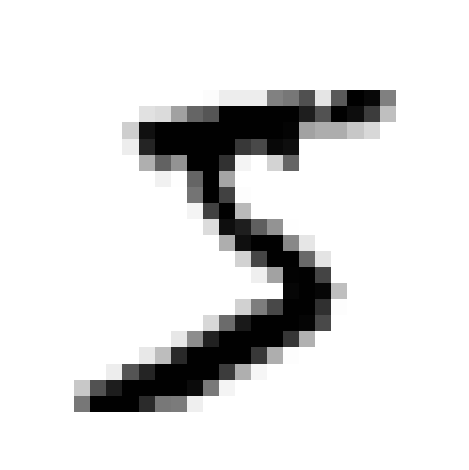

2019250059 한민욱


In [55]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")

save_fig("some_digit_plot")
plt.show()
print("2019250059 한민욱")

In [56]:
y[0]

'5'

In [57]:
y = y.astype(np.uint8)

In [58]:
def plot_digit(data):
  image = data.reshape(28, 28)
  plt.imshow(image, cmap = mpl.cm.binary,
             interpolation="nearest")
  plt.axis("off")

In [59]:
def plot_digits(instances, images_per_row=10, **options):
  size = 28
  images_per_row = min(len(instances), images_per_row)
  images = [instance.reshape(size, size) for instance in instances]
  n_rows = (len(instances) -1) // images_per_row + 1
  row_images = []
  n_empty = n_rows * images_per_row - len(instances)
  images.append(np.zeros((size, size * n_empty)))
  for row in range(n_rows):
    rimages = images[row * images_per_row : (row + 1) * images_per_row]
    row_images.append(np.concatenate(rimages, axis=1))
  image = np.concatenate(row_images, axis=0)
  plt.imshow(image, cmap = mpl.cm.binary, **options)
  plt.axis("off")
  #instances: 시각화할 숫자 이미지들을 담은 리스트입니다.
#images_per_row: 한 행에 표시할 이미지의 개수를 지정하는 매개변수입니다. 기본값은 10입니다.
#**options: plt.imshow() 함수에 전달할 추가적인 옵션들을 지정하는 매개변수입니다.
#먼저, size 변수에 28을 할당합니다. 이는 이미지의 크기가 28x28임을 의미합니다.
#다음으로, images_per_row 값을 현재 인스턴스의 개수와 비교하여 작은 값을 선택합니다. 이렇게 함으로써 한 행에 표시할 이미지의 개수가 인스턴스의 개수보다 작거나 같도록 합니다.

Saving figure more_digits_plot


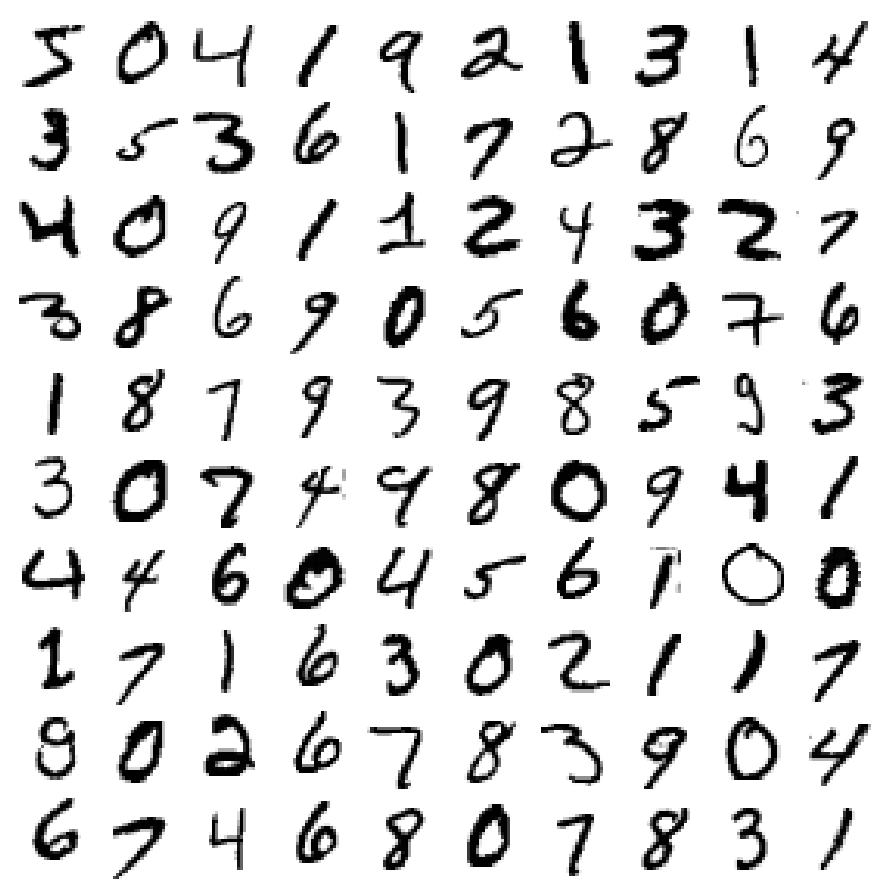

2019250059 한민욱


In [60]:
plt.figure(figsize=(9,9))
example_images = X[:100]
plot_digits(example_images, images_per_row=10)
save_fig("more_digits_plot")
plt.show()
print("2019250059 한민욱")
#주어진 코드는 plt.figure() 함수를 사용하여 새로운 그림을 생성하고, X 리스트의 처음 100개 이미지를 example_images로 선택합니다. 그리고 plot_digits() 함수를 호출하여 example_images를 시각화합니다. 이미지는 한 행에 10개씩 표시됩니다.

In [61]:
y[0]

5

In [62]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [63]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [64]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [65]:
sgd_clf.predict([some_digit])

array([ True])

In [66]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [67]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3)

for train_index, test_index in skfolds.split(X_train, y_train_5):
  clone_clf = clone(sgd_clf)
  X_train_folds = X_train[train_index]
  y_train_folds = y_train_5[train_index]
  X_test_fold = X_train[test_index]
  y_test_fold = y_train_5[test_index]

  clone_clf.fit(X_train_folds, y_train_folds)
  y_pred = clone_clf.predict(X_test_fold)
  n_correct = sum(y_pred == y_test_fold)
  print(n_correct / len(y_pred))
  print("2019250059 한민욱")
  #skfolds는 3개의 폴드로 데이터를 분할하기 위해 StratifiedKFold 객체를 생성합니다.

#for 루프에서는 skfolds.split(X_train, y_train_5)를 통해 훈련 세트를 폴드로 분할합니다. 각 폴드에 대해 다음 작업을 수행합니다:

#clone_clf 변수에 sgd_clf를 복제합니다.
#훈련 폴드의 인덱스를 사용하여 X_train_folds와 y_train_folds를 생성합니다.
#테스트 폴드의 인덱스를 사용하여 X_test_fold와 y_test_fold를 생성합니다.
#clone_clf를 X_train_folds와 y_train_folds로 훈련시킵니다.
##X_test_fold를 사용하여 예측을 수행하고, 예측값을 y_pred에 저장합니다.
#y_pred와 y_test_fold를 비교하여 정확도를 계산하고 출력합니다.

0.95035
2019250059 한민욱
0.96035
2019250059 한민욱
0.9604
2019250059 한민욱


In [68]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [69]:
never_5_clf = Never5Classifier()

cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

In [70]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [71]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [72]:
y_train_perfect_predictions = y_train_5 # pretend we reached perfection
confusion_matrix(y_train_5, y_train_perfect_predictions)


array([[54579,     0],
       [    0,  5421]])

In [73]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [74]:
4096 / (4096 + 1522)

0.7290850836596654

In [75]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [76]:
4096 / (4096 + 1325)

0.7555801512636044

In [77]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [78]:
4096 / (4096 + (1522 + 1325) / 2)

0.7420962043663375

In [79]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [80]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [81]:
y_some_digit_pred

array([ True])

In [82]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [83]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [84]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

Saving figure precision_recall_vs_threshold_plot


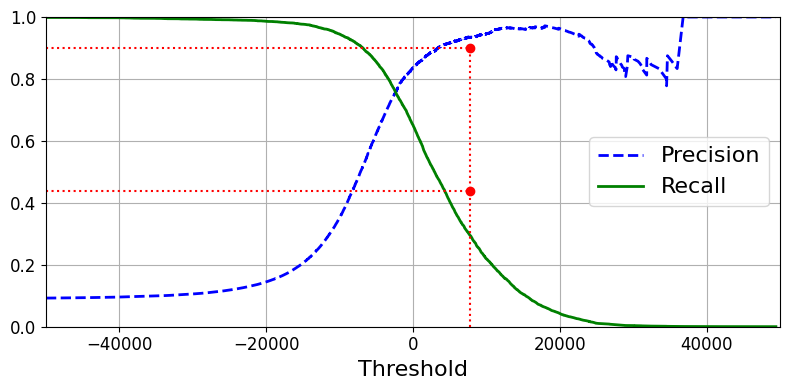

2019250059 한민욱


In [85]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16)
    plt.xlabel("Threshold", fontsize=16)
    plt.grid(True)
    plt.axis([-50000, 50000, 0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([7813, 7813], [0., 0.9], "r:")
plt.plot([-50000, 7813], [0.9, 0.9], "r:")
plt.plot([-50000, 7813], [0.4368, 0.4368], "r:")
plt.plot([7813], [0.9], "ro")
plt.plot([7813], [0.4368], "ro")

save_fig("precision_recall_vs_threshold_plot")
plt.show()
print("2019250059 한민욱")
#주어진 코드는 plot_precision_recall_vs_threshold라는 함수를 정의하고, 이를 사용하여 Precision-Recall 곡선을 그리는 예시입니다.

#plot_precision_recall_vs_threshold 함수는 세 개의 매개변수인 precisions, recalls, thresholds를 받아서 Precision과 Recall을 Threshold에 대해 그래프로 그립니다.

In [86]:
(y_train_pred == (y_scores > 0)).all()

True

Saving figure precision_vs_recall_plot


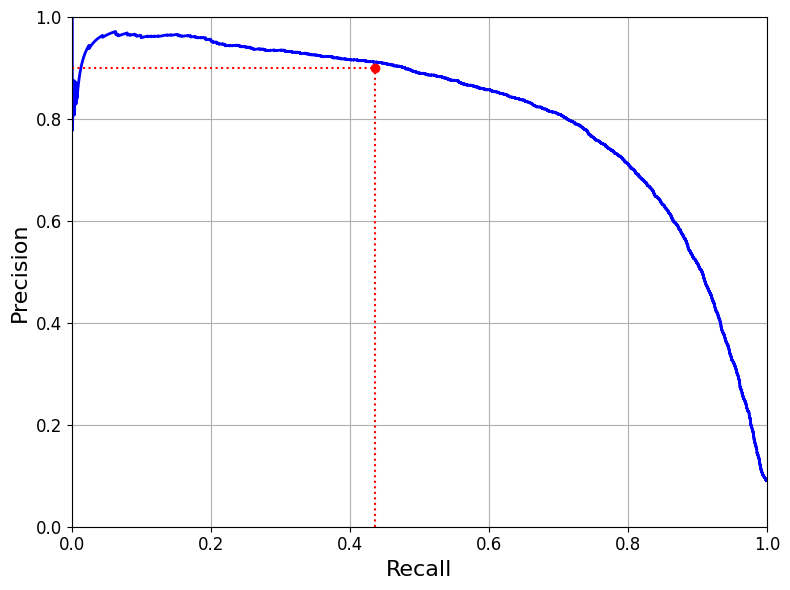

2019250059 한민욱


In [87]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([0.4368, 0.4368], [0, 0.9], "r:")
plt.plot([0.0, 0.4368], [0.9, 0.9], "r:")
plt.plot([0.4368], [0.9], "ro")
save_fig("precision_vs_recall_plot")
plt.show()
print("2019250059 한민욱")
#plot_precision_vs_recall 함수는 두 개의 매개변수인 precisions와 recalls를 받아서 Recall에 대한 Precision을 그래프로 그립니다.

#함수 내부에서는 plt.plot() 함수를 사용하여 Recall을 x축으로, Precision을 y축으로 하는 파란색 실선을 그립니다. x축과 y축의 레이블을 설정하고, x축 범위를 0부터 1까지, y축 범위를 0부터 1까지로 설정하고, 그리드를 표시합니다.

In [88]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

In [89]:
threshold_90_precision

3370.0194991439557

In [90]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [91]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [92]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706